### Dataset Information


Additional Information

This dataset is randomly collected from an Iranian telecom companyâ€™s database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attributes that are in this dataset
are call failures, frequency of SMS, number of complaints, number of distinct calls, subscription length, age group, the charge amount, type of service, seconds of use, status, frequency of use, and Customer Value.

All of the attributes except for attribute churn is the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.


### Import required libraries

In [1]:
# Modules needed
import sys

# scipy # for statistics
import scipy

# numpy for array, matrix and vector calculations
import numpy as np

# matplotlib for graphs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# scikit-learn for machine learning
import sklearn

# Load  specialised libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# model selection
from sklearn import model_selection
# kpi: evaulating the performance of the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import fbeta_score

# the stars of the show: the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import plotly.offline as po
import plotly.graph_objs as go
from sklearn import metrics
from sklearn.preprocessing import RobustScaler # To scale data


In [2]:
# Read CSV file
df= pd.read_csv('Iranian Churn Dataset.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


### Variable Information
#### Anonymous Customer ID
#### Call Failures: number of call failures
#### Complains: binary (0: No complaint, 1: complaint)
#### Subscription Length: total months of subscription
#### Charge Amount: Ordinal attribute (0: lowest amount, 9: highest amount)
#### Seconds of Use: total seconds of calls
#### Frequency of use: total number of calls
#### Frequency of SMS: total number of text messages
#### Distinct Called Numbers: total number of distinct phone calls 
#### Age Group: ordinal attribute (1: younger age, 5: older age)
#### Tariff Plan: binary (1: Pay as you go, 2: contractual)
#### Status: binary (1: active, 2: non-active)
#### Churn: binary (1: churn, 0: non-churn) - Class label
#### Customer Value: The calculated value of customer



### Exploratory Data Analysis

In [3]:
# check dataset dimmension 
df.shape

(3150, 14)

dataset has data for 3,150 unique customers

In [4]:
# check for missing values 
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

No missing values in the dataset

In [5]:
#check data types in our dataset
df.dtypes

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

In [6]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [7]:
# check unique counts within the churn column
df['Churn'].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

dataset is imbalanced, will need to apply some balancing method to avoid a skewed model 

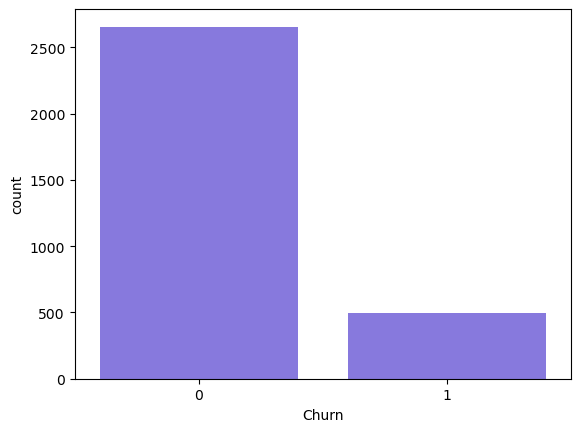

In [8]:
# PLot countplot for target variable for better visualization 
sns.countplot(data = df, x = 'Churn', color = 'mediumslateblue')
pass

In [9]:
# Hold out sample for data scoring; 80% of non churners
non_churners = df[df['Churn'] == 0]
non_churners.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [10]:
non_churners.shape

(2655, 14)

In [11]:
from sklearn.model_selection import train_test_split # To randomly split the dataset by 80%
seed = 5
score_pct = 0.8
model_data, score_data = train_test_split(non_churners,
                                          test_size = score_pct, 
                                          random_state = seed)

len(model_data)

531

In [12]:
# Concat non churner model data with churner data
churners = df[df['Churn'] == 1]
model_data = pd.concat([model_data, churners], ignore_index=True)
model_data.shape

(1026, 14)

In [13]:
model_data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,6,0,25,0,395,19,3,5,2,1,2,25,32.13,0
1,0,0,32,0,2780,19,0,12,3,1,1,30,111.96,0
2,13,0,40,1,4675,77,12,19,3,1,1,30,238.08,0
3,0,0,34,0,2595,19,0,14,3,1,1,30,104.56,0
4,18,0,31,1,14835,213,39,29,2,1,1,25,852.66,0


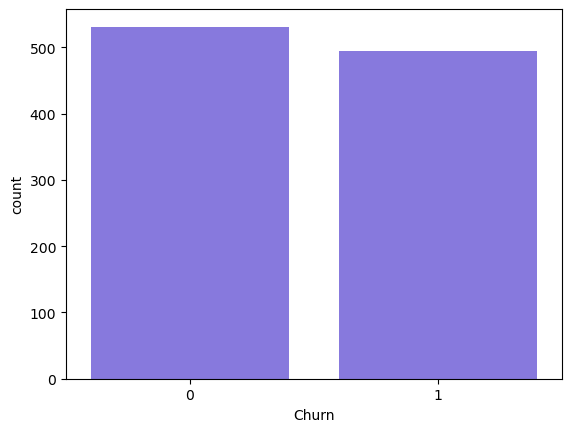

In [14]:
# PLot new countplot for target variable
sns.countplot(data = model_data, x = 'Churn', color = 'mediumslateblue')
pass

Dataset now alot more balanced 

In [15]:
# Check for potential duplicate rows
print('Number of duplicates:', model_data.duplicated().sum())

Number of duplicates: 59


In [16]:
# lets remove duplicate rows
model_data.drop_duplicates(subset=None, keep='first',inplace= True) 

In [17]:
print('Number of duplicates:', model_data.duplicated().sum())

Number of duplicates: 0


we good now, all duplicated removed 

In [18]:
model_data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,6,0,25,0,395,19,3,5,2,1,2,25,32.13,0
1,0,0,32,0,2780,19,0,12,3,1,1,30,111.96,0
2,13,0,40,1,4675,77,12,19,3,1,1,30,238.08,0
3,0,0,34,0,2595,19,0,14,3,1,1,30,104.56,0
4,18,0,31,1,14835,213,39,29,2,1,1,25,852.66,0


In [19]:
model_data.shape

(967, 14)

In [20]:
model_data['Churn'].value_counts()

0    521
1    446
Name: Churn, dtype: int64

In [21]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            967 non-null    int64  
 1   Complains                967 non-null    int64  
 2   Subscription  Length     967 non-null    int64  
 3   Charge  Amount           967 non-null    int64  
 4   Seconds of Use           967 non-null    int64  
 5   Frequency of use         967 non-null    int64  
 6   Frequency of SMS         967 non-null    int64  
 7   Distinct Called Numbers  967 non-null    int64  
 8   Age Group                967 non-null    int64  
 9   Tariff Plan              967 non-null    int64  
 10  Status                   967 non-null    int64  
 11  Age                      967 non-null    int64  
 12  Customer Value           967 non-null    float64
 13  Churn                    967 non-null    int64  
dtypes: float64(1), int64(13)


Dataset look all good 

In [22]:
model_data.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [23]:
from sklearn.preprocessing import MinMaxScaler

# List of columns to scale
columns_to_scale = ['Call  Failure', 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age', 'Customer Value']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the selected columns and transform the data
model_data[columns_to_scale] = scaler.fit_transform(model_data[columns_to_scale])


In [24]:
model_data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,0.171429,0,0.511628,0.0,0.023533,0.074803,0.005941,0.056818,2,1,2,0.250,0.015394,0
1,0.000000,0,0.674419,0.0,0.165624,0.074803,0.000000,0.136364,3,1,1,0.375,0.053640,0
2,0.371429,0,0.860465,0.1,0.278522,0.303150,0.023762,0.215909,3,1,1,0.375,0.114065,0
3,0.000000,0,0.720930,0.0,0.154602,0.074803,0.000000,0.159091,3,1,1,0.375,0.050095,0
4,0.514286,0,0.651163,0.1,0.883825,0.838583,0.077228,0.329545,2,1,1,0.250,0.408511,0


### Lets visualize some insights from our data

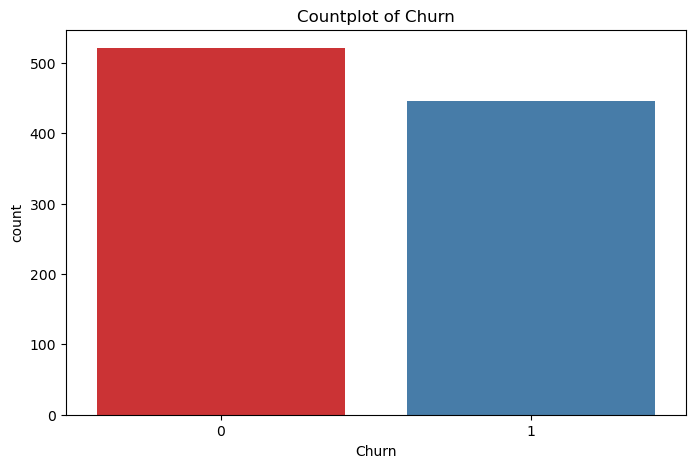

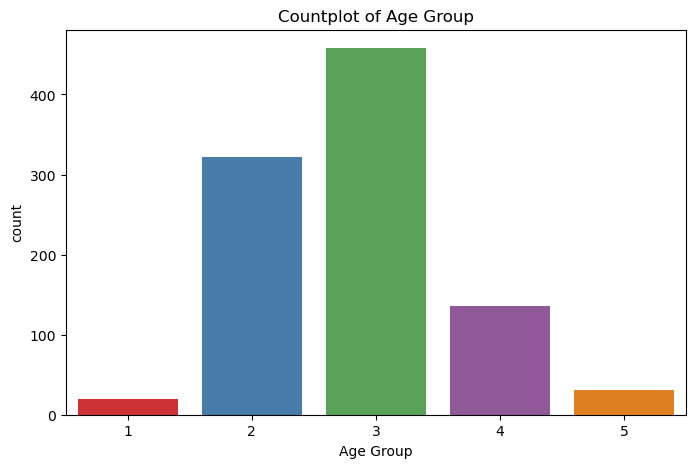

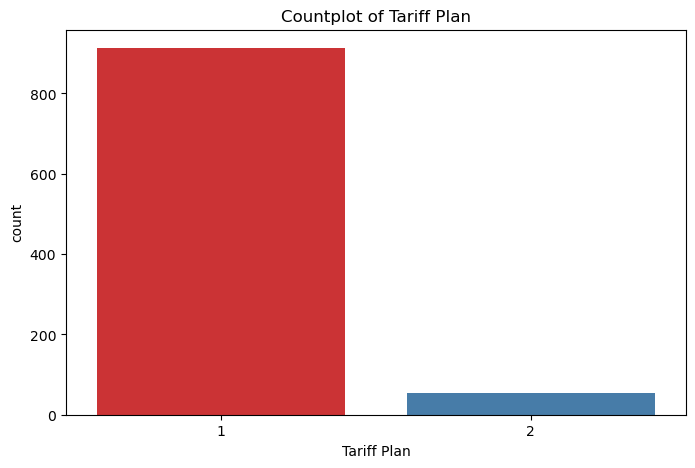

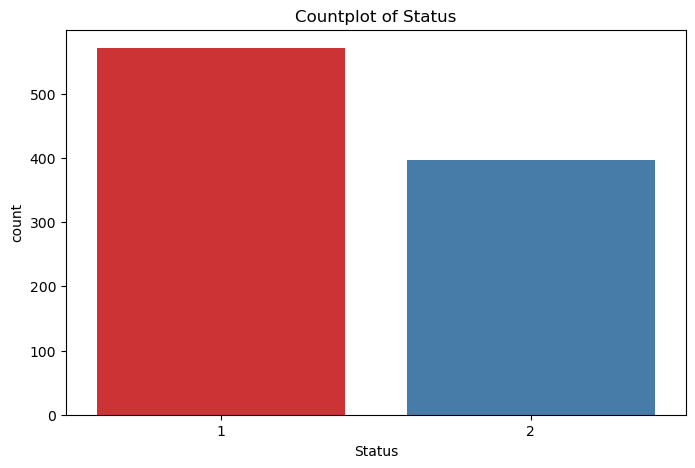

In [25]:
# lets plot some countplots of the features to target variable 


# Define the categorical columns to plot
categorical_columns = ['Churn', 'Age Group', 'Tariff Plan', 'Status']

# Create countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=model_data, x=column, palette='Set1')
    plt.title(f'Countplot of {column}')
    plt.show()


### Model Selection and Evaluation

In [26]:
X = model_data.drop('Churn', axis=1)  # Features
y = model_data['Churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Trees": ExtraTreesClassifier()
}

best_model = None
best_accuracy = 0.0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

print(f"The best model is: {best_model} with an accuracy of {best_accuracy:.2f}%")



Logistic Regression Accuracy: 0.83%

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        93
           1       0.83      0.85      0.84       101

    accuracy                           0.83       194
   macro avg       0.83      0.83      0.83       194
weighted avg       0.83      0.83      0.83       194

----------------------------------------
Random Forest Accuracy: 0.89%

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        93
           1       0.88      0.91      0.89       101

    accuracy                           0.89       194
   macro avg       0.89      0.89      0.89       194
weighted avg       0.89      0.89      0.89       194

----------------------------------------
Support Vector Classifier Accuracy: 0.80%

Classification Report for Support Vector Classifier:
            

In [27]:
#further evaluating my best model using cross validation

from sklearn.model_selection import cross_val_score, KFold

model = RandomForestClassifier()  # initialize my model 

kfold = KFold(n_splits=10, shuffle=True, random_state=42)  # specify cross-validation configuration(10-fold cross-validation)

scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

mean_accuracy = scores.mean()
std_accuracy = scores.std()

# print out the results 
# Print the results
print("Mean Accuracy: {:.2f}%".format(mean_accuracy * 100))
print("Standard Deviation: {:.2f}".format(std_accuracy))



Mean Accuracy: 91.73%
Standard Deviation: 0.03


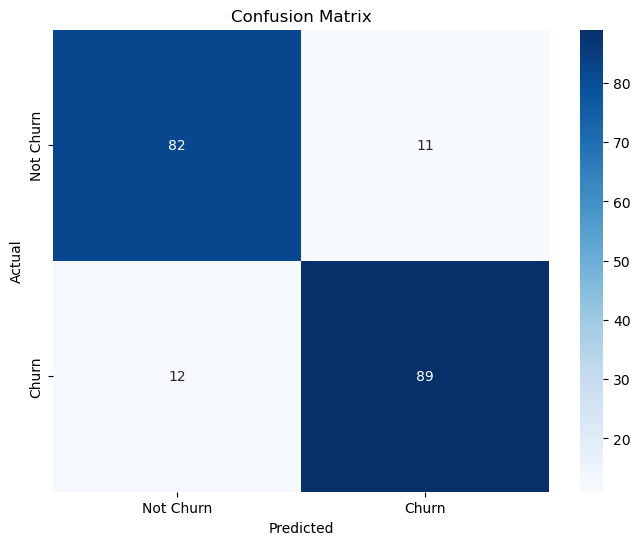

In [28]:
# Calculate the confusion matrix of the winning model 
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Feature Importance

In [29]:
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Match feature importances to feature names
feature_names = X_train.columns 
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or visualize the results
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

Status: 0.1830
Seconds of Use: 0.1260
Customer Value: 0.1189
Frequency of use: 0.1188
Complains: 0.1169
Subscription  Length: 0.0891
Frequency of SMS: 0.0691
Distinct Called Numbers: 0.0637
Call  Failure: 0.0436
Age: 0.0250
Age Group: 0.0248
Charge  Amount: 0.0199
Tariff Plan: 0.0011


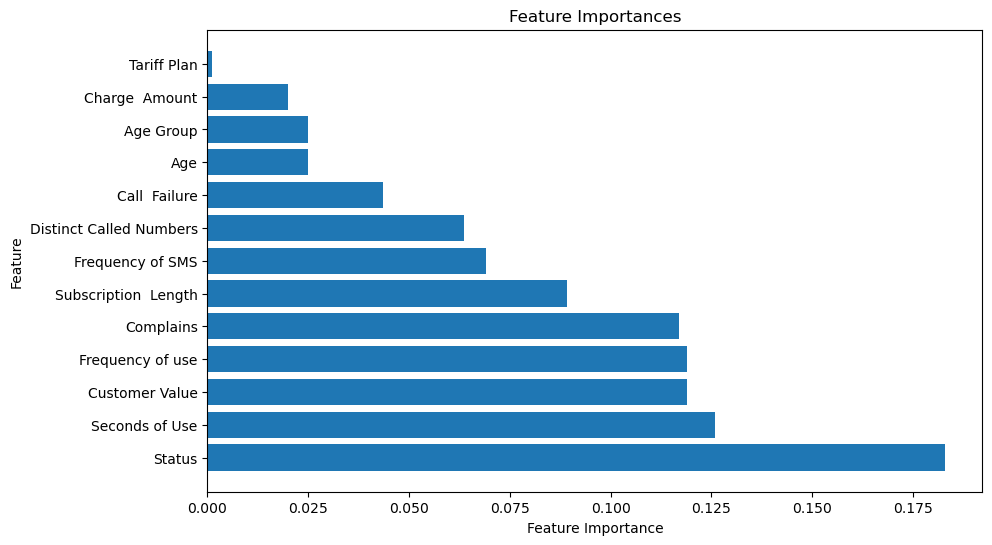

In [30]:
# lets visulaize our result 
# Extract feature names and importances
features, importances = zip(*sorted_feature_importance)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')

plt.show()


### save Model

In [31]:
import joblib

best_model = RandomForestClassifier()

best_model.fit(X_train, y_train)

# Specify the file name for model to be saved
model_filename = 'best_model.pkl'

# Save the best model to the specified file
joblib.dump(best_model, model_filename)


['best_model.pkl']

### Model Deployment 

In [32]:
# check scoring dataframe
non_churners.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [33]:
# Check for potential duplicate rows
print('Number of duplicates:', non_churners.duplicated().sum())

Number of duplicates: 251


In [34]:
# Make a copy of the DataFrame
non_churners = non_churners.copy()

# safely apply the drop_duplicates method on the copied DataFrame to avoid error
non_churners.drop_duplicates(subset=None, keep='first', inplace=True)


In [35]:
# double check to ensure all duplicates are removed 
print('Number of duplicates:', non_churners.duplicated().sum())

Number of duplicates: 0


In [36]:
# List of columns to scale
columns_to_scale = ['Call  Failure', 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age', 'Customer Value']


# Fit the scaler to the selected columns and transform the data
non_churners[columns_to_scale] = scaler.fit_transform(non_churners[columns_to_scale])

In [37]:
non_churners.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,0.222222,0,0.795455,0.0,0.255705,0.278431,0.009579,0.175258,3,1,1,0.375,0.091277,0
1,0.000000,0,0.818182,0.0,0.018607,0.019608,0.013410,0.041237,2,1,2,0.250,0.021261,0
2,0.277778,0,0.772727,0.0,0.143534,0.235294,0.687739,0.247423,3,1,1,0.375,0.709617,0
3,0.277778,0,0.795455,0.0,0.245641,0.258824,0.001916,0.360825,1,1,1,0.000,0.110849,0
4,0.083333,0,0.795455,0.0,0.140023,0.227451,0.003831,0.340206,1,1,1,0.000,0.067338,0


In [38]:
non_churners.shape

(2404, 14)

In [39]:
# drop the churn column
non_churners = non_churners.drop(columns=['Churn'])

In [40]:
#load model 
loaded_model = joblib.load(model_filename)

# make prediction on cleaned score dataset
predictions = loaded_model.predict(non_churners)


In [41]:
# Create a DataFrame with a column for predictions
predictions_df = pd.DataFrame({'Predicted_Churn': predictions})
predictions_df

,Predicted_Churn
0,0
1,1
2,0
3,0
4,0
...,...
2399,0
2400,0
2401,0
2402,0


In [42]:
prediction_counts = predictions_df['Predicted_Churn'].value_counts()
print(prediction_counts)


0    2212
1     192
Name: Predicted_Churn, dtype: int64


Model predicted 83% accuracy

### Propensity to Churn

In [43]:

# Use the model to predict probabilities
propensity_scores = loaded_model.predict_proba(non_churners)

# Create a DataFrame with the propensity scores in percentage terms
propensity_df = pd.DataFrame(propensity_scores * 100, columns=['Propensity_0(%)', 'Propensity_1(%)'])

# Concatenate the propensity DataFrame with your original 'non_churners' DataFrame
non_churners_with_propensity = pd.concat([non_churners, propensity_df], axis=1)

# Now we have a DataFrame 'non_churners_with_propensity' with propensity scores in percentage


In [45]:
non_churners_with_propensity.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Propensity_0(%),Propensity_1(%)
0,0.222222,0.0,0.795455,0.0,0.255705,0.278431,0.009579,0.175258,3.0,1.0,1.0,0.375,0.091277,99.0,1.0
1,0.000000,0.0,0.818182,0.0,0.018607,0.019608,0.013410,0.041237,2.0,1.0,2.0,0.250,0.021261,14.0,86.0
2,0.277778,0.0,0.772727,0.0,0.143534,0.235294,0.687739,0.247423,3.0,1.0,1.0,0.375,0.709617,97.0,3.0
3,0.277778,0.0,0.795455,0.0,0.245641,0.258824,0.001916,0.360825,1.0,1.0,1.0,0.000,0.110849,98.0,2.0
4,0.083333,0.0,0.795455,0.0,0.140023,0.227451,0.003831,0.340206,1.0,1.0,1.0,0.000,0.067338,90.0,10.0


 propensity to churn analysis is a strategic tool that helps businesses anticipate and address customer churn effectively, ultimately contributing to improved customer satisfaction, resource optimization, and sustained business success.From above table we can identify customers with >70% likelyhood of churning and with this info the marketing team can build their winback strategies.